In [75]:
import numpy as np
import scipy
import scipy.stats

from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from glob import glob

import seaborn as sns

In [2]:
glob("data/*")

['data\\dictionary.txt', 'data\\test_data.tsv', 'data\\training_data.tsv']

In [14]:
train = pd.read_csv("data/training_data.tsv", delimiter="\t", header=None, names=["document_id", "word_id", "count"])
test = pd.read_csv("data/test_data.tsv", delimiter="\t", header=None, names=["document_id", "word_id", "count"])
dictionary = pd.read_csv("data/dictionary.txt", header=None, names=["word"]).values

In [27]:
train = np.genfromtxt("data/training_data.tsv", delimiter="\t", dtype=np.int32)
dictionary = np.genfromtxt("data/dictionary.txt", dtype=np.string_)

In [28]:
dictionary

array([b'aarp', b'abandon', b'abandoned', ..., b'zogbys', b'zone',
       b'zones'], dtype='|S40')

## Question 1.

Using the training data, compute the maximum likelihood estimation over the words across
the documents. Plot a histogram showing 20 most probable words.

In [55]:
counts = np.zeros_like(dictionary, np.int32)

In [60]:
for document_id, word_id, count in train:
    counts[word_id - 1] += count

In [61]:
dictionary[np.argmax(counts)]

b'bush'

In [62]:
max(counts)

3835

In [88]:
max_counts = counts[np.argsort(counts)[-20:]]
most_probable_words = dictionary[np.argsort(counts)[-20:]]

In [89]:
max_counts

array([ 942,  947,  952,  961,  961,  961, 1057, 1062, 1100, 1263, 1276,
       1355, 1358, 1364, 1479, 1495, 1591, 2288, 2633, 3835])

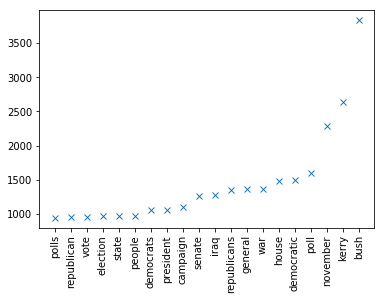

In [91]:
plt.xticks(rotation=90)
plt.plot(most_probable_words, max_counts, "x")

## Question 2.

What is the log-probability of the test data if we use the MLE model from question 1)? Note
that the test set contains words which are not contained in the training set. Explain

In [15]:
for document_id, word_id, count in train.iterrows():
    counts[word_id] += count

ValueError: not enough values to unpack (expected 3, got 2)

In [287]:
total = sum(train.num)
grouped_train = train.drop("document_id", axis=1).groupby("word_id").sum()

word_ids = np.array(grouped_train.index)
word_probs = grouped_train.num.values / total

In [290]:
dictionary[word_ids[np.argsort(word_probs)[-20:]]]

array([['timed'],
       ['statebystate'],
       ['republicans'],
       ['voted'],
       ['elections'],
       ['peoples'],
       ['presidential'],
       ['demographic'],
       ['campaigned'],
       ['republicansforkerry'],
       ['senategovernors'],
       ['iraqi'],
       ['ward'],
       ['generally'],
       ['democraticleaning'],
       ['household'],
       ['polled'],
       ['npr'],
       ['kerryedwards'],
       ['bushcheney']], dtype=object)

In [32]:
words = train.loc[train.document_id == 1].word_id.values

In [42]:
doc = train.loc[train.document_id == 1]

In [162]:
word_ids = doc.word_id

total = sum(doc.num.values)

def unigram_prob(p):
    return -scipy.stats.multinomial.pmf(doc.num.values, n=total, p=p)

In [152]:
len(doc.num.values)

183

In [170]:
scipy.optimize.minimize(unigram_prob, doc.num.values / total, options={"maxiter": 10000})

      fun: -3.735112555180694e-88
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([4.90141552e-91, 4.90141552e-91, 4.90141552e-91, 3.70455432e-91,
       4.90141552e-91, 4.90141552e-91, 4.90141552e-91, 4.90141552e-91,
       4.90141552e-91, 4.90141552e-91, 4.90141552e-91, 4.90141552e-91,
       4.90141552e-91, 4.90141552e-91, 4.90141552e-91, 4.90141552e-91,
       4.90141552e-91, 4.90141552e-91, 4.90141552e-91, 4.90141552e-91,
       2.73567203e-91, 4.90141552e-91, 4.90141552e-91, 3.07765913e-91,
       4.90141552e-91, 4.90141552e-91, 4.90141552e-91, 3.70455432e-91,
       4.90141552e-91, 4.90141552e-91, 4.90141552e-91, 4.90141552e-91,
       4.90141552e-91, 4.90141552e-91, 4.90141552e-91, 4.90141552e-91,
       3.30560059e-91, 4.90141552e-91, 3.70455432e-91, 4.90141552e-91,
       4.90141552e-91, 4.9014

In [155]:
p = scipy.stats.dirichlet.rvs(alpha=np.repeat(0.1, len(words)), size=1)[0]
unigram_prob(p)

-0.0

In [157]:
ps = scipy.stats.dirichlet.rvs(alpha=np.repeat(0.1, len(words)), size=10000)

In [161]:
min(unigram_prob(ps))

-0.0

In [88]:
scipy.stats.multinomial.pmf([2,10], n=5, p=[0.3, 0.7])

0.0

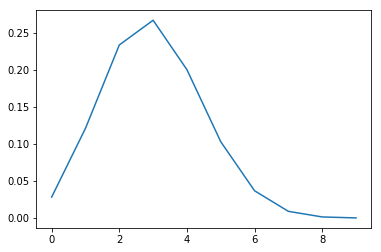

In [83]:
plt.plot(scipy.stats.binom.pmf(range(10), n=10, p=0.3))

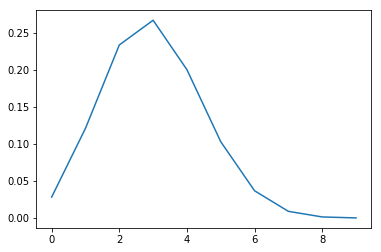

In [71]:
plt.plot(scipy.stats.binom.pmf(range(10), p=0.3, n=10))

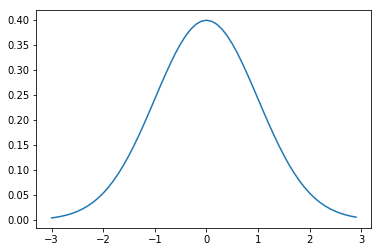

In [79]:
x = np.arange(-3, 3, 0.1)
plt.plot(x, scipy.stats.norm.pdf(x, loc=0, scale=1))

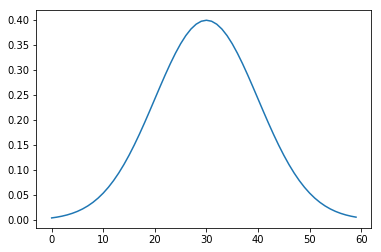

In [80]:
plt.plot(scipy.stats.norm.pdf(np.arange(-3, 3, 0.1), loc=0, scale=1))